Luke Sidle
11/01/24class AllTimeLeadersGrids(Endpoint):
Data At Hand

Here I import all of the plugins I will most likely use.

In [90]:
import urllib
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import base64
import matplotlib.ticker as ticker
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

This is the API I will be using for my project. It is the Swar API for the NBA and it is live updated. 

In [91]:
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints._base import Endpoint
from nba_api.stats.endpoints import AllTimeLeadersGrids
from nba_api.stats.library.http import NBAStatsHTTP
from nba_api.stats.library.parameters import LeagueID, PerModeSimple, SeasonType

Here I access the data for LeBron James over his whole career. I did research and found his player number through this line of code
"players.find_players_by_first_name('lebron')" in the demonstration on their github.

In [92]:
LeBrondf = playercareerstats.PlayerCareerStats(player_id='2544') 
Robertdf = playercareerstats.PlayerCareerStats(player_id='305') 
Johndf = playercareerstats.PlayerCareerStats(player_id='304')
Mosesdf = playercareerstats.PlayerCareerStats(player_id='77449')
Kevindf = playercareerstats.PlayerCareerStats(player_id='708')
Wiltdf = playercareerstats.PlayerCareerStats(player_id='76375')
Hakeemdf = playercareerstats.PlayerCareerStats(player_id='165')
Kareemdf = playercareerstats.PlayerCareerStats(player_id='76003')
DeAndredf = playercareerstats.PlayerCareerStats(player_id='201599')
Stephdf = playercareerstats.PlayerCareerStats(player_id='201939')
Stevedf = playercareerstats.PlayerCareerStats(player_id='70')
Karldf = playercareerstats.PlayerCareerStats(player_id='252')

Here I access the data frames of all of the LeBron's, and every other leader that is not LeBron, seasons. It has every single piece of data from NBA.com

In [93]:
LeBrondf.get_data_frames()[0]
Robertdf.get_data_frames()[0]
Johndf.get_data_frames()[0]
Mosesdf.get_data_frames()[0]
Kevindf.get_data_frames()[0]
Wiltdf.get_data_frames()[0]
Hakeemdf.get_data_frames()[0]
Kareemdf.get_data_frames()[0]
DeAndredf.get_data_frames()[0]
Stephdf.get_data_frames()[0]
Stevedf.get_data_frames()[0]
Karldf.get_data_frames()[0]

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,252,1985-86,00,1610612762,UTH,22.0,81,76,2475.0,504,...,0.481,174,544,718,236,105,44,279,295,1203
1,252,1986-87,00,1610612762,UTH,23.0,82,82,2857.0,728,...,0.598,278,577,855,158,104,60,237,323,1779
2,252,1987-88,00,1610612762,UTH,24.0,82,82,3198.0,858,...,0.700,277,709,986,199,117,50,325,296,2268
3,252,1988-89,00,1610612762,UTH,25.0,80,80,3126.0,809,...,0.766,259,594,853,219,144,70,285,286,2326
4,252,1989-90,00,1610612762,UTH,26.0,82,82,3122.0,914,...,0.762,232,679,911,226,121,50,304,259,2540
5,252,1990-91,00,1610612762,UTH,27.0,82,82,3302.0,847,...,0.770,236,731,967,270,89,79,244,268,2382
6,252,1991-92,00,1610612762,UTH,28.0,81,81,3054.0,798,...,0.778,225,684,909,241,108,51,248,226,2272
7,252,1992-93,00,1610612762,UTH,29.0,82,82,3099.0,797,...,0.740,227,692,919,308,124,85,240,261,2217
8,252,1993-94,00,1610612762,UTH,30.0,82,82,3329.0,772,...,0.694,235,705,940,328,125,126,234,268,2063
9,252,1994-95,00,1610612762,UTH,31.0,82,82,3126.0,830,...,0.742,156,715,871,285,129,85,236,269,2187


I have access to all the other data I need within this API. I will be using the alltimeleadersgrids.md endpoint and the playercompare.md endpoint. 
I will be using the alltimeleadersgrids to determine the stats LeBron leads LeBron is in the top 10 for. I will use those to justify my stance and then I will use the playercompare to compare LeBron to others in the top 10s he is not in. 

In [94]:
class AllTimeLeadersGrids(Endpoint):

SyntaxError: incomplete input (858071111.py, line 1)

In [ ]:
career.get_json

In [95]:
get_endpoint_contents.get_data_frames(nba_api/stats/endpoints/alltimeleadersgrids.py, endpoint_analysis)

NameError: name 'get_endpoint_contents' is not defined

My plan for analyzing the data I have in hand is to create plots comparing LeBron to the all time leader of a statistic. There are grids provided in one of the endpoints and to be honest I am still trying to figure out how to load those into the notebook. The notation is not what I am used to, but I am getting some help with that. 

In [96]:
analyze_endpoint.get_data_frames(AllTimeLeadersGrids, pause=1)

NameError: name 'analyze_endpoint' is not defined

In [97]:
AllTimeLeadersGrids.get_data_frames(player_id = '2544')[0]

TypeError: Endpoint.get_data_frames() got an unexpected keyword argument 'player_id'

In [98]:
AllTimeLeadersGrids.get_data_frames()[0]

TypeError: Endpoint.get_data_frames() missing 1 required positional argument: 'self'

I am attempting to figure out how to load different pieces into my notebook these last two, but I am not successful. 
I have decided to go with a different method after trying to get this work unsuccessfully.

I will go onto the NBA website to see the all-time leader of each stat and then I will put their player stats in the notebook. I will merge those into multiple data frames and load them into CSVs. Then I will compare LeBron to each different leader through plots.

In [99]:
lebron = pd.DataFrame(LeBrondf.get_data_frames()[0])
robert = pd.DataFrame(Robertdf.get_data_frames()[0])
john = pd.DataFrame(Johndf.get_data_frames()[0])
moses = pd.DataFrame(Mosesdf.get_data_frames()[0])
kevin = pd.DataFrame(Kevindf.get_data_frames()[0])
wilt = pd.DataFrame(Wiltdf.get_data_frames()[0])
hakeem = pd.DataFrame(Hakeemdf.get_data_frames()[0])
kareem = pd.DataFrame(Kareemdf.get_data_frames()[0])
deandre = pd.DataFrame(DeAndredf.get_data_frames()[0])
steph = pd.DataFrame(Stephdf.get_data_frames()[0])
karl = pd.DataFrame(Karldf.get_data_frames()[0])

In [100]:
lebron.to_csv('LeBron.csv')
robert.to_csv('Robert.csv')
john.to_csv('John.csv')
moses.to_csv('Moses.csv')
kevin.to_csv('Kevin.csv')
wilt.to_csv('Wilt.csv')
hakeem.to_csv('Hakeem.csv')
kareem.to_csv('Kareem.csv')
deandre.to_csv('DeAndre.csv')
steph.to_csv('Steph.csv')
karl.to_csv('Karl.csv')

In [101]:
df1 = pd.read_csv('LeBron.csv')
df2 = pd.read_csv('Robert.csv')
df3 = pd.read_csv('John.csv')
df4 = pd.read_csv('Moses.csv')
df5 = pd.read_csv('Kevin.csv')
df6 = pd.read_csv('Wilt.csv')
df7 = pd.read_csv('Hakeem.csv')
df8 = pd.read_csv('Kareem.csv')
df9 = pd.read_csv('DeAndre.csv')
df10 = pd.read_csv('Steph.csv')
df11 = pd.read_csv('Karl.csv')

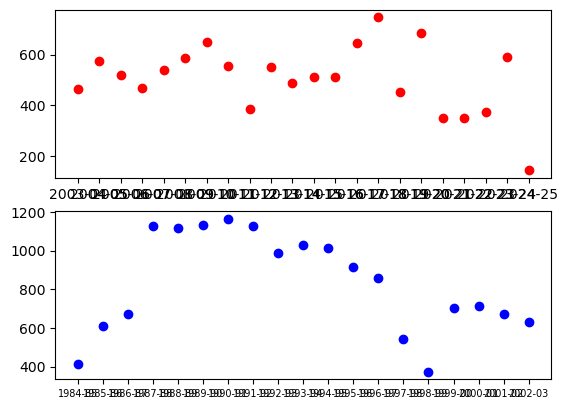

In [115]:
fig1, ax1 = plt.subplots(2) 
x = np.arange(100)
ax1[0].scatter(df1['SEASON_ID'], df1['AST'], color = 'red')
ax1[1].scatter(df3['SEASON_ID'], df3['AST'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 7)
plt.show()

Here is proof of the concept. I just need to make the graphs looks nice. Note here: I will not be using the PTS data to compare because LeBron is the points leader. I might compare him to the person in 2nd place, but I think just saying he is the highest scorer in NBA history states enough.

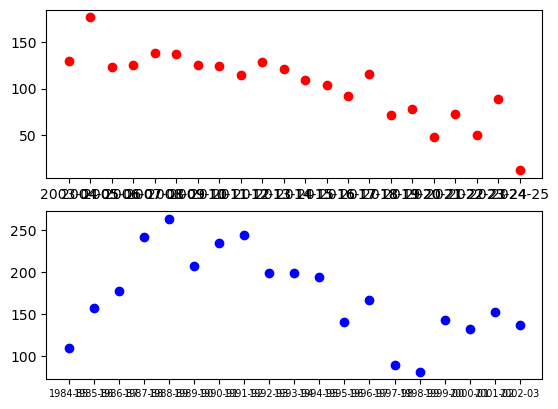

In [116]:
fig2, ax2 = plt.subplots(2) 
x = np.arange(100)
ax2[0].scatter(df1['SEASON_ID'], df1['STL'], color = 'red')
ax2[1].scatter(df3['SEASON_ID'], df3['STL'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 7)
plt.show()

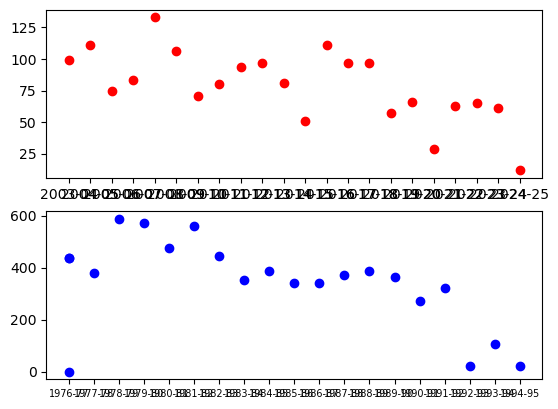

In [117]:
fig3, ax3 = plt.subplots(2) 
x = np.arange(100)
ax3[0].scatter(df1['SEASON_ID'], df1['OREB'], color = 'red')
ax3[1].scatter(df4['SEASON_ID'], df4['OREB'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 7)
plt.show()

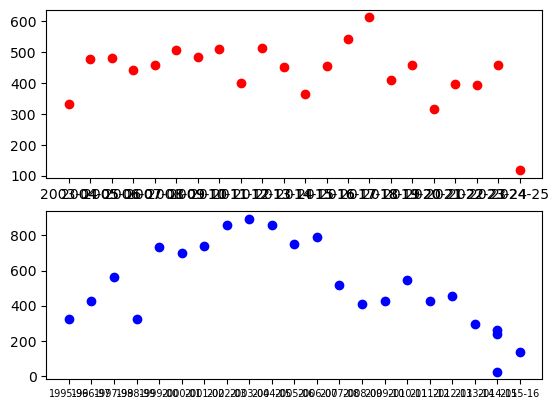

In [118]:
fig4, ax4 = plt.subplots(2) 
x = np.arange(100)
ax4[0].scatter(df1['SEASON_ID'], df1['DREB'], color = 'red')
ax4[1].scatter(df5['SEASON_ID'], df5['DREB'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 7)
plt.show()

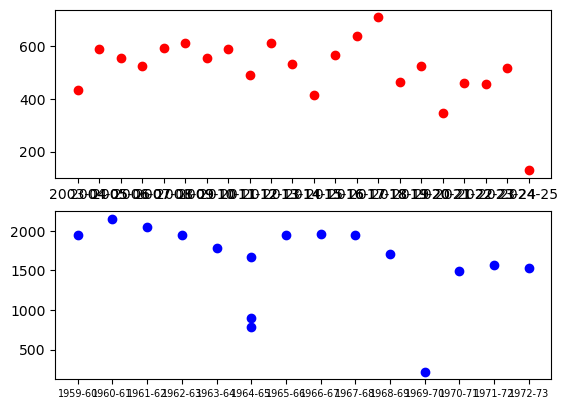

In [119]:
fig5, ax5 = plt.subplots(2) 
x = np.arange(100)
ax5[0].scatter(df1['SEASON_ID'], df1['REB'], color = 'red')
ax5[1].scatter(df6['SEASON_ID'], df6['REB'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 7)
plt.show()

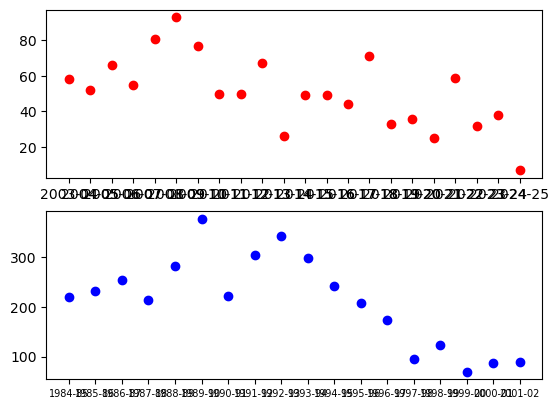

In [120]:
fig6, ax6 = plt.subplots(2) 
x = np.arange(100)
ax6[0].scatter(df1['SEASON_ID'], df1['BLK'], color = 'red')
ax6[1].scatter(df8['SEASON_ID'], df8['BLK'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 7)
plt.show()

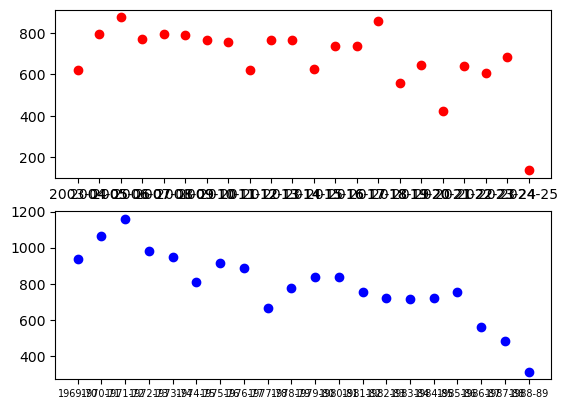

In [121]:
fig7, ax7 = plt.subplots(2) 
x = np.arange(100)
ax7[0].scatter(df1['SEASON_ID'], df1['FGM'], color = 'red')
ax7[1].scatter(df8['SEASON_ID'], df8['FGM'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 7)
plt.show()

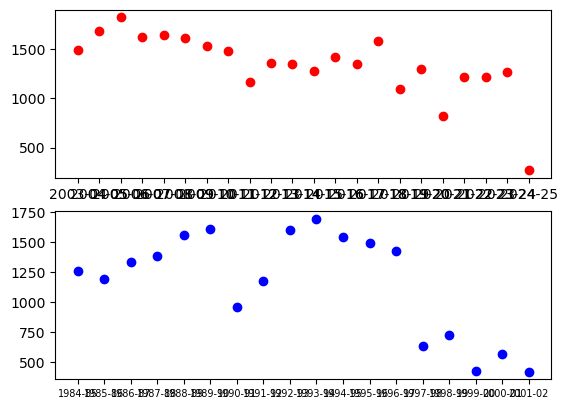

In [122]:
fig7, ax7 = plt.subplots(2) 
x = np.arange(100)
ax7[0].scatter(df1['SEASON_ID'], df1['FGA'], color = 'red')
ax7[1].scatter(df7['SEASON_ID'], df7['FGA'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 7)
plt.show()

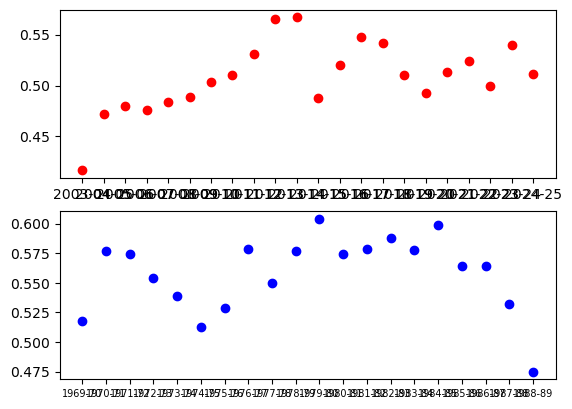

In [123]:
fig8, ax8 = plt.subplots(2) 
x = np.arange(100)
ax8[0].scatter(df1['SEASON_ID'], df1['FG_PCT'], color = 'red')
ax8[1].scatter(df9['SEASON_ID'], df9['FG_PCT'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 7)
plt.show()

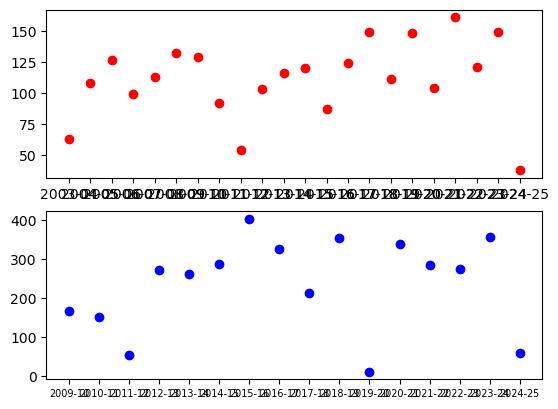

In [125]:
fig9, ax9 = plt.subplots(2) 
x = np.arange(100)
ax9[0].scatter(df1['SEASON_ID'], df1['FG3M'], color = 'red')
ax9[1].scatter(df10['SEASON_ID'], df10['FG3M'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 7)
plt.show()

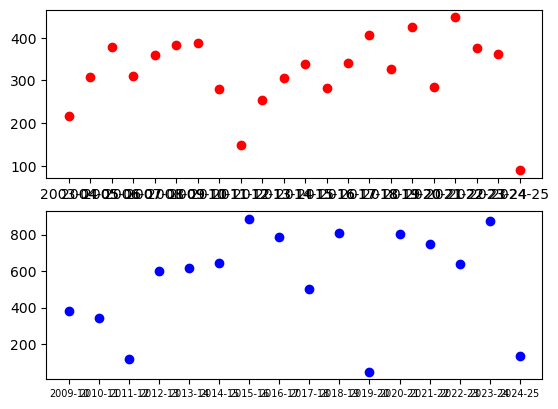

In [126]:
fig10, ax10 = plt.subplots(2) 
x = np.arange(100)
ax10[0].scatter(df1['SEASON_ID'], df1['FG3A'], color = 'red')
ax10[1].scatter(df10['SEASON_ID'], df10['FG3A'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 7)
plt.show()

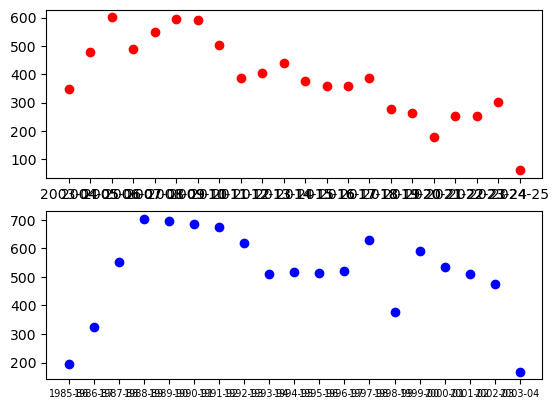

In [127]:
fig11, ax11 = plt.subplots(2) 
x = np.arange(100)
ax11[0].scatter(df1['SEASON_ID'], df1['FTM'], color = 'red')
ax11[1].scatter(df11['SEASON_ID'], df11['FTM'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 7)
plt.show()

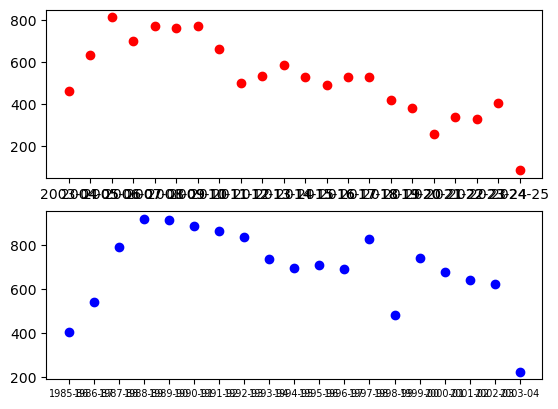

In [128]:
fig12, ax12 = plt.subplots(2) 
x = np.arange(100)
ax12[0].scatter(df1['SEASON_ID'], df1['FTA'], color = 'red')
ax12[1].scatter(df11['SEASON_ID'], df11['FTA'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 7)
plt.show()

This is all the data I need to work with and analyze. I will be analzying it and comparing LeBron over the years to the different leaders in the different statitics. 